# How to give the perfect TED Talk

![](./featured_speech_leech.gif)

# Background Info

TED is a nonprofit devoted to spreading ideas, usually in the form of short, powerful talks **(18 minutes or less)**. TED began in 1984 as a conference where Technology, Entertainment and Design converged, and today covers almost all topics — from science to business to global issues — in more than 100 languages. Meanwhile, independently run TEDx events help share ideas in communities around the world.
As of 2015, TED and its sister TEDx chapters have published more than 4000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

We have used a python web scrapper (not shown) to scrap TED.com for all the available information it can offer on talks from the beginning of Ted till 2021.
There have been many analysis on TED talks but most of them use a dataset which was collected mid 2017. We beleive that it would be interesting to find how things have changed in these 3 years. Whenever there is a mention-worthy difference, it will be pointed out.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
pd.set_option('mode.chained_assignment', None)

In [ ]:
# Reading dataframe
df = pd.read_csv('TED_Talk.csv')
len(df)

4928

# Let's start by examining the scraped data

In [ ]:
df.head()

,talk__id,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,number_of__speakers,...,talk__recommendations__blurb,talk__recommendations,number_of__talk__recommendations,related_talks,number_of__related_talks,intro_duration,ad_duration,post_ad_duration,external__duration,external__start_time
0,66,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,69154230,NaN,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,...,The education expert has a lot to say about th...,"[{'title': 'Reading list', 'description': '', ...",1,"[{'id': '30217', 'hero': 'https://s3.amazonaws...",6,11.82,3.33,0.83,1204.0,0.0
1,2405,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",63556835,NaN,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,...,NaN,NaN,0,"[{'id': '2236', 'hero': 'https://pe.tedcdn.com...",4,11.82,3.33,0.83,589.0,0.0
2,1569,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,59958589,NaN,1262,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,1,...,NaN,NaN,0,"[{'id': '1042', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,1263.0,0.0
3,848,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,53105906,NaN,1084,How do you explain when things don't go as we ...,TEDx Talk,TEDxPuget Sound,1,...,The leadership expert shares books and films t...,"[{'title': 'Reading List', 'description': '', ...",1,"[{'id': '1998', 'hero': 'https://pe.tedcdn.com...",6,11.82,3.33,0.83,1115.0,0.0
4,1042,The power of vulnerability,Brené Brown studies human connection -- our ab...,51501858,NaN,1219,"So, I'll start with this: a couple years ago, ...",TEDx Talk,TEDxHouston,1,...,Dive deeper into shame and vulnerability (in a...,"[{'title': 'Reading List', 'description': '', ...",1,"[{'id': '1391', 'hero': 'https://s3.amazonaws....",6,11.82,3.33,0.83,1250.0,0.0


In [ ]:
df.dtypes

talk__id                                 int64
talk__name                              object
talk__description                       object
view_count                               int64
comment_count                          float64
duration                                 int64
transcript                              object
video_type_name                         object
event                                   object
number_of__speakers                      int64
speaker__id                            float64
speaker__name                           object
speaker__description                    object
speaker__who_he_is                      object
speaker__why_listen                     object
speaker__what_others_say                object
speaker__is_published                   object
all_speakers_details                    object
is_talk_featured                          bool
has_talk_citation                       object
recording_date                          object
published_tim

Finding number of unique and null values in each column: 

In [ ]:
pd.DataFrame([[col, df[col].nunique(), df[col].isna().sum()]  for  col  in df], columns = ['Column Name', 'Unique Count', 'Missing Count'])

,Column Name,Unique Count,Missing Count
0,talk__id,4927,0
1,talk__name,4927,0
2,talk__description,4927,0
3,view_count,4739,0
4,comment_count,0,4928
5,duration,1278,0
6,transcript,4359,569
7,video_type_name,8,0
8,event,563,0
9,number_of__speakers,11,0


We don't need all these columns, so let's clean it up a bit. We are also going to remove all TED-ed videos since they do not represent public talk samples which we are trying to study.

In [ ]:
df = df[['talk__id', 'talk__name', 'talk__description', 'view_count', 'duration','number_of__subtitled_videos','recording_date',
              'event','speaker__name','speaker__description','published_timestamp','talks__tags','language']]

In [ ]:
# Changing column names
names = {
    'talk__id': 'talk_id',
    'talk__name':'name',
    'talk__description': 'description',
    'speaker__name':'speaker_name',
    'speaker__description':'speaker_occupation',
    'published_timestamp':'published_date',
    'talks__tags':'talk_tags',
    'number_of__subtitled_videos': 'number_of_subtitles',
    'recording_date':'film_date'

}
df.rename(columns=names,inplace=True)
df = df[['talk_id','name','speaker_name','description','speaker_occupation','talk_tags','duration',
                   'view_count','event','film_date', 'published_date','language','number_of_subtitles'
                   ]]
df = df[df['event']!= 'TED-Ed']
len(df)

4247

In [ ]:
df.head()

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,"Author, educator","['children', 'creativity', 'culture', 'dance',...",1164,69154230,TED2006,2006-02-25,2006-06-27 00:11:00,en,62
1,2405,This is what happens when you reply to spam email,James Veitch,"Suspicious emails: unclaimed insurance bonds, ...","Comedian, writer","['comedy', 'curiosity', 'communication', 'humo...",588,63556835,TEDGlobal>Geneva,2015-12-08,2020-10-23 13:51:31,en,47
2,1569,Your body language may shape who you are,Amy Cuddy,(NOTE: Some of the findings presented in this ...,Social psychologist,"['body language', 'brain', 'business', 'psycho...",1262,59958589,TEDGlobal 2012,2012-06-26,2012-10-01 15:00:08,en,50
3,848,How great leaders inspire action,Simon Sinek,Simon Sinek has a simple but powerful model fo...,Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1084,53105906,TEDxPuget Sound,2009-09-17,2010-05-04 09:31:00,en,47
4,1042,The power of vulnerability,Brené Brown,Brené Brown studies human connection -- our ab...,"Vulnerability researcher, storyteller","['TEDx', 'communication', 'culture', 'depressi...",1219,51501858,TEDxHouston,2010-06-06,2010-12-23 14:45:00,en,51


In [ ]:
df['published_date'].max()

'2021-01-11 15:51:58'

Great! Our data set seems to be updated. Let's change the format of the published data

In [ ]:
df['published_date'] =df['published_date'].apply(lambda x: x[:10])

In [ ]:
# Finding null values in columns
pd.isnull(df).sum()

talk_id                  0
name                     0
speaker_name             1
description              0
speaker_occupation     101
talk_tags                0
duration                 0
view_count               0
event                    0
film_date                2
published_date           0
language                 0
number_of_subtitles      0
dtype: int64

As seen before, we only have one null value in the speaker_name field and the film_date field so dropping them will not impact the results from the other 4247 entries. We will also replace null occupation with unknown.

In [ ]:
df.dropna(subset = ['speaker_name','film_date'], inplace = True)
df['speaker_occupation'].fillna('unknown',inplace = True)

In [ ]:
df['view_count'].value_counts()

0          184
2514707      2
1369785      2
544262       2
24526        2
          ... 
1388387      1
3394903      1
896339       1
6036817      1
5529600      1
Name: view_count, Length: 4057, dtype: int64

There can't be videos with absolutely 0 views (We checked some of them), so let's replace them with the next minimum value. We have decided to replace this "noise" with the minimum value because These videos seem not to have much views on them, otherwise ted would not have hidden their number of views.

In [ ]:
df[df['view_count'] == 0]

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles
4742,10365,A mathematical model for predicting Parkinson's,Eleftheria Pissadaki,What if we looked at Parkinson's as an neurolo...,Brain disruptor,"['brain', 'neuroscience', 'medical research']",581,0,TED@IBM,2017-12-06,2018-02-12,en,0
4743,27801,How to benefit from uncomfortable conversations,Jason Jay,Facilitator Jason Jay dissects how conversatio...,"Director of Sustainability, Sloan School of Ma...","['Social Science', 'language', 'communication'...",1037,0,TEDxBocaRaton,2018-10-13,2018-11-12,en,0
4744,18813,Can 0.7% of corporate profits fund the world's...,Sahil Sethi,The United Nations has set a goal to free the ...,Conscious Capitalist,"['capitalism', 'business', 'economics']",427,0,TED@State Street Boston,2015-11-03,2018-07-30,en,0
4745,6880,My quest to sleep in every former slave dwelli...,Joseph McGill,"Behind the ""big house"" in pre-Civil War Americ...",unknown,"['history', 'architecture', 'Slavery', 'societ...",930,0,TEDxRapidCity,2017-06-28,2017-12-08,en,0
4746,67192,Countdown Session 4: Transformation (Full sess...,Hosted by Prajakta Koli and Hannah Stocking,The world around us is mainly made of two thin...,Digital content creator,"['climate change', 'technology', 'science', 'C...",4055,0,Countdown,2020-10-10,2020-10-15,en,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,53587,"""Meditation from Thais""",Min Kym,Violinist Min Kym performs a haunting yet beau...,"Violinist, author","['performance', 'music', 'violin']",294,0,TEDSummit 2019,2019-07-20,2020-01-24,en,0
4924,6059,Using the Super Bowl to give back,Joe Davis,"The Super Bowl is one of the biggest sports, c...",Game changer,"['sports', 'business', 'development', 'leaders...",402,0,TED@BCG San Francisco,2013-10-30,2017-12-01,en,0
4925,31237,How we can fight antibiotic-resistant superbug...,Vikas Jaitely,"The alarming rise of ""superbugs"" could claim u...",Pharmaceutical engineer,"['health care', 'bacteria', 'Vaccines']",733,0,"TED@Merck KGaA, Darmstadt, Germany",2018-11-26,2019-01-14,en,0
4926,4233,How technology can reconnect parents and kids,Lana Yarosh,When children are separated from their parents...,"Assistant Professor, University of Minnesota D...","['technology', 'children', 'family', 'parentin...",1158,0,TEDxMinneapolis,2017-08-18,2017-11-10,en,0


In [ ]:
min_value = df[df['view_count'] > 0]['view_count'].min()
min_value

10031

In [ ]:
df['view_count'] = df['view_count'].replace(0,min_value)
df['view_count'].value_counts()

10031      185
1369785      2
2514707      2
544262       2
24526        2
          ... 
1388387      1
3394903      1
896339       1
6036817      1
5529600      1
Name: view_count, Length: 4056, dtype: int64

# Most viewed talks
First step towards conducting the best TED-talk ever, is getting to know the competition. We will start with finding the most viewed talks so far on TED.

In [ ]:
pop_talks = df[['name', 'speaker_name', 'view_count', 'published_date']].sort_values('view_count', ascending=False)[:15]
pop_talks

,name,speaker_name,view_count,published_date
0,Do schools kill creativity?,Sir Ken Robinson,69154230,2006-06-27
1,This is what happens when you reply to spam email,James Veitch,63556835,2020-10-23
2,Your body language may shape who you are,Amy Cuddy,59958589,2012-10-01
3,How great leaders inspire action,Simon Sinek,53105906,2010-05-04
4,The power of vulnerability,Brené Brown,51501858,2010-12-23
5,Inside the mind of a master procrastinator,Tim Urban,46492849,2016-03-15
6,How to speak so that people want to listen,Julian Treasure,44971966,2014-06-27
7,The next outbreak? We're not ready,Bill Gates,39167037,2015-04-03
8,My philosophy for a happy life,Sam Berns,38875621,2018-03-28
9,What makes a good life? Lessons from the longe...,Robert Waldinger,36500033,2015-12-23


<b> Observations: </b>
<ul>
    <li>Do schools kill creativity? by Sir Ken Robinson	is the most viewed talk with almost <b> 70 million</b> views and nearly <b> 20 million </b> of them is in the years between 2018 till 2021  </li>
    <li> Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are.</li>
    <li>Bill Gates' talk about the pandemic is in 7th place with nearly <b> 40 million views </b>. This talk was not even in the top 10 talks in 2017 and only had <b> 2.2 millions </b>, despite the fact that there have been other talks on 2015 that made it to the top 10 in 2017 </li>
    </ul>
 <b> Gates was right. </b>

Let's plot these plots in a bar chart

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Sir Ken Robinson'),
  Text(1, 0, 'James Veitch'),
  Text(2, 0, 'Amy Cuddy'),
  Text(3, 0, 'Simon Sinek'),
  Text(4, 0, 'Brené Brown'),
  Text(5, 0, 'Tim Urban'),
  Text(6, 0, 'Julian Treasure'),
  Text(7, 0, 'Bill Gates'),
  Text(8, 0, 'Sam Berns'),
  Text(9, 0, 'Robert Waldinger'),
  Text(10, 0, 'Cameron Russell'),
  Text(11, 0, 'Graham Shaw'),
  Text(12, 0, 'Mary Roach'),
  Text(13, 0, 'Tom Thum'),
  Text(14, 0, 'Pamela Meyer')])

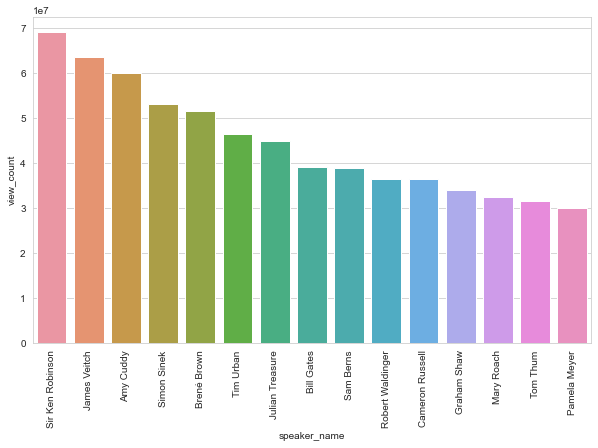

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
g = sns.barplot(x='speaker_name', y='view_count', data=pop_talks)
plt.xticks(rotation=90)

Okay, so the competition is tough, but aren't all worthy competitions are? let us investigate the summary statistics and the distibution of the views on various TED Talks.

(0.0, 10000000.0)

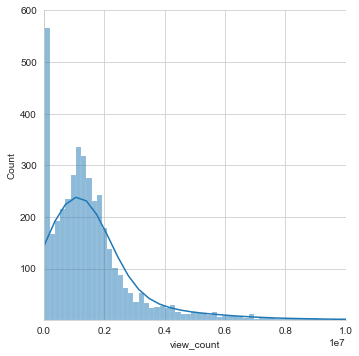

In [ ]:
# The default plot for distplot is hisogram so the videos are divided into equal sized bins,
# kde = true shows a kernel density estimate to the data
sns.displot(df['view_count'],kde =True)
plt.ylim(1,600)
plt.xlim(0,1e7)

In [ ]:
df['view_count'].describe()

count    4.244000e+03
mean     1.967822e+06
std      3.613386e+06
min      1.003100e+04
25%      6.380735e+05
50%      1.295512e+06
75%      2.047826e+06
max      6.915423e+07
Name: view_count, dtype: float64

<b>Observations</b>
<ul>
    <li> The average number of views on TED Talk videos is nearly <b> 2 millions </b> and the median is <b> 1.3 million.</b> Good news! TED is popular. <b>If you ace your TED talk, your ideas will reach a large number of people. </b> </li>
   <li>Most of videos have views less than  5 million, so may be it will be better to draw a cutoff there.</li>
</ul>

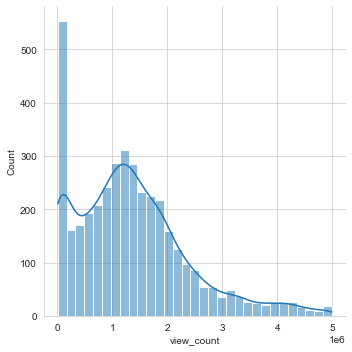

In [ ]:
sns.displot(df[df['view_count'] < 5e6]['view_count'], kde = True)

# Analysing TED Talks by the month and the year
What is the most frequent times for TED talks? How many months do you have left to prepare? We need to know when will the battle take place!
![](./2.gif)

In [ ]:
df['film_date'].value_counts()

2018-04-10    100
2019-04-15     99
2017-04-24     97
2017-08-27     54
2007-03-03     54
             ... 
2011-11-13      1
2013-10-26      1
2012-09-01      1
2014-01-15      1
2014-03-16      1
Name: film_date, Length: 1105, dtype: int64

In [ ]:
# Extracting month and day from film date
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df['month'].value_counts()).reset_index()

month_df.columns = ['month', 'talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

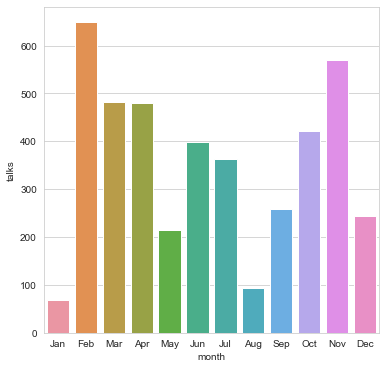

In [ ]:
plt.figure(figsize = (6,6))
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

**February** is clearly the most popular month for TED Conferences followed by **November** whereas **August** and **January** are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February. Let us check the distribution for TEDx talks only.

In [ ]:
# Extracting a dataframe for TEDx events only
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']
len(df_x)

907

<AxesSubplot:xlabel='month', ylabel='talks'>

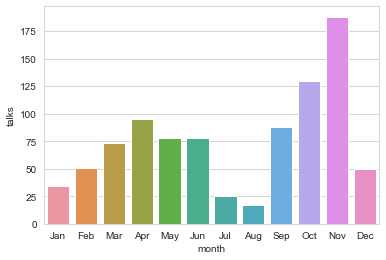

In [ ]:
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

For TEDx Talks, **Novermber** is the most popular month followed by **October**. However, only few of TEDx talks are uploaded to the website. A slightly more accurate statement would be that the most popular **TEDx talks take place the most in October and November**.

Okay so we know the month, and we know to try to have our talk in a not TEDx event. What about the day? Is thera a **lucky** day?

In [ ]:
import datetime
# Extracting the day from the film date
def getday(x):
    year, month, day = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [ ]:
# Adding a .day column to the dataframe
df['day'] = df['film_date'].apply(getday)

<AxesSubplot:xlabel='day', ylabel='talks'>

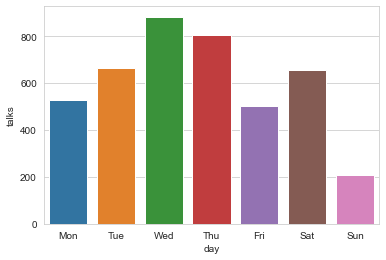

In [ ]:
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']
sns.barplot(x='day', y='talks', data=day_df, order=day_order)

The distribution is almost a bell curve shape with most days being **Wednesday** and **Thursday**. You better know how many days you have left!

Finally, let's see how ted has grown over the year to see if it is truly woth it.

<AxesSubplot:xlabel='year', ylabel='talks'>

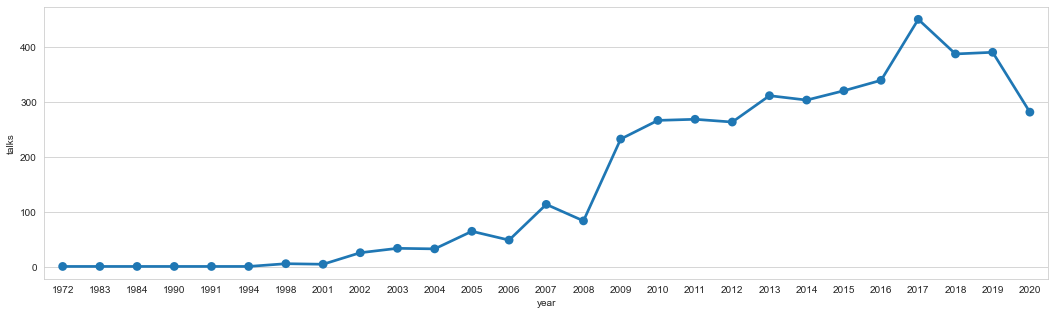

In [ ]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[0])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
year_df = year_df.sort_values('year')
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

**Observation**
<ul>
    <li>It appears that the number of talks have been increasing over the years and truly spiked in <b>2009</b>. It would be intersting if we could find the real purpose behind this spike. There are many events and breakthroughs such as Barack Obama becoming president and the introduction of blockchain. Who knows?</li>
    <li>There is a sharp decrease in 2020 <b> and we know who to blame </b>  </li>

Finally, to put it all together, let us construct a heat map that shows us the number of talks by month and year. This will give us a good summary of the distribution of talks.

In [ ]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
hmap_df = df.copy()
hmap_df['film_date'] = hmap_df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[0]))
hmap_df = pd.pivot_table(hmap_df[['film_date', 'name']], index='film_date', aggfunc='count').reset_index()
hmap_df['month_num'] = hmap_df['film_date'].apply(lambda x: months[x.split()[0]])
hmap_df['year'] = hmap_df['film_date'].apply(lambda x: x.split()[1])
hmap_df = hmap_df.sort_values(['year', 'month_num'])
hmap_df = hmap_df[['month_num', 'year', 'name']]
hmap_df = hmap_df.pivot('month_num', 'year', 'name')
hmap_df = hmap_df.fillna(0)

<AxesSubplot:xlabel='year', ylabel='month_num'>

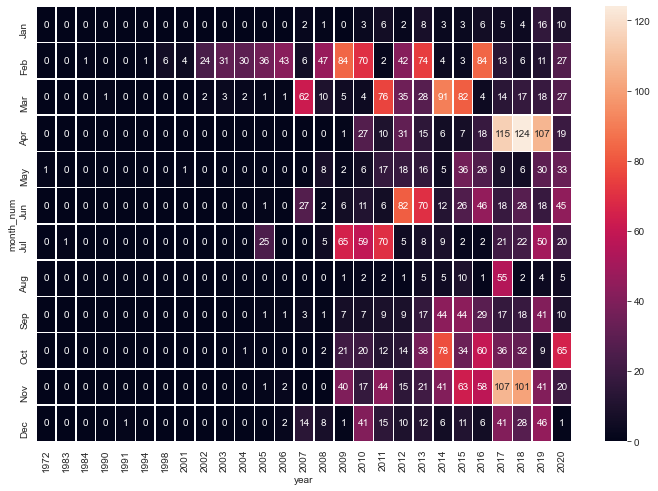

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_df, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

# Now let's see who is the most popular TED Talker
To beat them you have to join them. Who are the who are most likely to be invited on TED?

In [ ]:
# First, seeing type of ted talk event
df['event'].value_counts()

TED2018              104
TED2019              101
TED2020               98
TED2017               97
TED2014               84
                    ... 
TEDxIndianapolis       1
BBC TV                 1
TEDxNorthwesternU      1
TEDxUND                1
TEDxWellington         1
Name: event, Length: 561, dtype: int64

In [ ]:
speaker_df = df.groupby('speaker_name').count().reset_index()[['speaker_name', 'view_count']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
1802,Juan Enriquez,10
2319,Matt Walker,10
1340,Hans Rosling,9
1298,Greg Gage,8
2220,Marco Tempest,7
440,Bill Gates,7
1480,Jacqueline Novogratz,6
2906,Rives,6
728,Dan Ariely,6
2383,Michael Green,5


It appears that most dominant talks are TED-Ed talks which are just short (<= 5 mins) pop science videos which are not the "talk" we are intending to study

**Juan Enriquez** the mexican-amerian business man and author along with **Matt Walker** the English scientist and professor of neuroscience and psychology at the University of California are have the most talks on TED and **Hans Rosling** the Swedish physician comes third. 
Interstingly, **Matt Walker** was not even in the top 10 speakers in 2017.

In [ ]:
df[df['speaker_name'] == 'Matt Walker']

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles,month,day,year
63,41105,Sleep is your superpower,Matt Walker,Sleep is your life-support system and Mother N...,"Sleep scientist, professor, author","['sleep', 'medicine', 'health', 'medical resea...",1158,12634618,TED2019,2019-04-15,2019-05-10,en,28,Apr,Mon,2019
1094,61900,Why sleep matters now more than ever,Matt Walker,A good night's sleep has perhaps never been mo...,"Sleep scientist, professor, author","['sleep', 'medicine', 'health', 'pandemic', 'b...",3641,2246890,TED Connects,2020-04-01,2020-04-02,en,0,Apr,Wed,2020
2604,65061,How caffeine and alcohol affect your sleep,Matt Walker,"Caffeine wakes you up, and alcohol makes you n...","Sleep scientist, professor, author","['sleep', 'science', 'health', 'human body']",294,1222374,Sleeping with Science,2020-07-22,2020-07-22,en,0,Jul,Wed,2020
3455,65067,6 tips for better sleep,Matt Walker,Want to not only fall asleep quickly but also ...,"Sleep scientist, professor, author","['science', 'sleep', 'human body', 'health']",328,782711,Sleeping with Science,2020-09-02,2020-09-02,en,0,Sep,Wed,2020
3663,65066,How much sleep do you really need?,Matt Walker,"You know you need to get enough sleep, but the...","Sleep scientist, professor, author","['sleep', 'science', 'health', 'human body']",174,643440,Sleeping with Science,2020-08-26,2020-08-26,en,0,Aug,Wed,2020
3812,65062,Hacking your memory -- with sleep,Matt Walker,We've all been told to get a good night's slee...,"Sleep scientist, professor, author","['sleep', 'science', 'health', 'human body']",282,551762,Sleeping with Science,2020-07-29,2020-08-10,en,0,Jul,Wed,2020
3917,65060,A walk through the stages of sleep,Matt Walker,Did you know you go on a journey every night a...,"Sleep scientist, professor, author","['sleep', 'health', 'human body', 'science']",287,481033,Sleeping with Science,2020-07-15,2020-07-15,en,0,Jul,Wed,2020
3955,65063,What's the connection between sleep and Alzhei...,Matt Walker,Does not getting enough sleep lead to Alzheime...,"Sleep scientist, professor, author","['human body', 'science', 'sleep', 'health']",307,456617,Sleeping with Science,2020-08-05,2020-08-10,en,0,Aug,Wed,2020
4011,65064,How sleep affects your emotions,Matt Walker,It's not just your imagination -- you're more ...,"Sleep scientist, professor, author","['sleep', 'human body', 'science', 'health']",220,419922,Sleeping with Science,2020-08-12,2020-08-12,en,0,Aug,Wed,2020
4200,65065,How sleep can improve your immunity,Matt Walker,One of the best things that you can do to boos...,"Sleep scientist, professor, author","['sleep', 'science', 'human body', 'health']",137,292785,Sleeping with Science,2020-08-19,2020-08-19,en,0,Aug,Wed,2020


**Matt walker** appears to be the star of Sleeping with Science. That is predicted since he identifies his occupation as a 'Sleep scientist' 

# What about the occupation of the speakers? Is there a special job that TED prefers its speakers to have?

In [ ]:
occupation_df = df[df['speaker_occupation']!= 'unknown'].groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'view_count']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df

,occupation,appearances
2410,Writer,57
1300,Journalist,50
897,Entrepreneur,49
149,Artist,49
131,Architect,37
...,...,...
923,Environmental and literacy activist,1
921,Environment and social VP at Apple,1
920,"Entrepreneur, writer",1
919,"Entrepreneur, urban farmer",1


<AxesSubplot:xlabel='occupation', ylabel='appearances'>

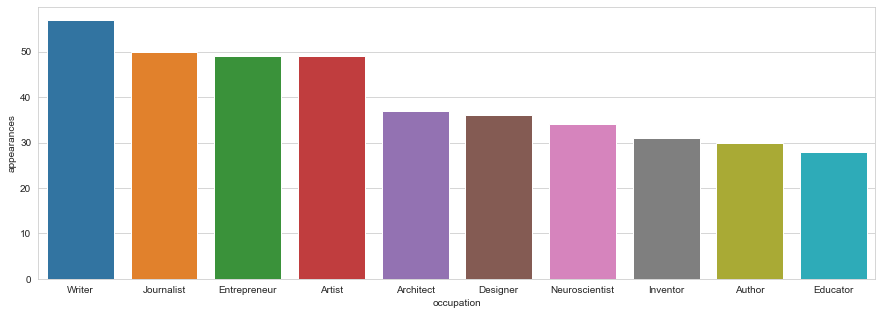

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))

**Observations :**
<ul>
    <li> <b> Writers</b> are the most popular with more than 50 speakers identifying themselves as the aforementioned. </li>
    <li> <b>Journalists and Entrepreneurs </b> come in second and thid place with very near results </li>
</ul>
This result must be taken with a pinch of salt as a considerable number of speakers identify themselves with multiple professions (for example, writer and author are both on the top 10 occupations while the technical difference between both jobs is minor). 


Do some professions tend to attract a larger number of viewers? Do answer this question let us visualise the relationship between the top 10 most popular professions and the views thet garnered in the form of a box plot.

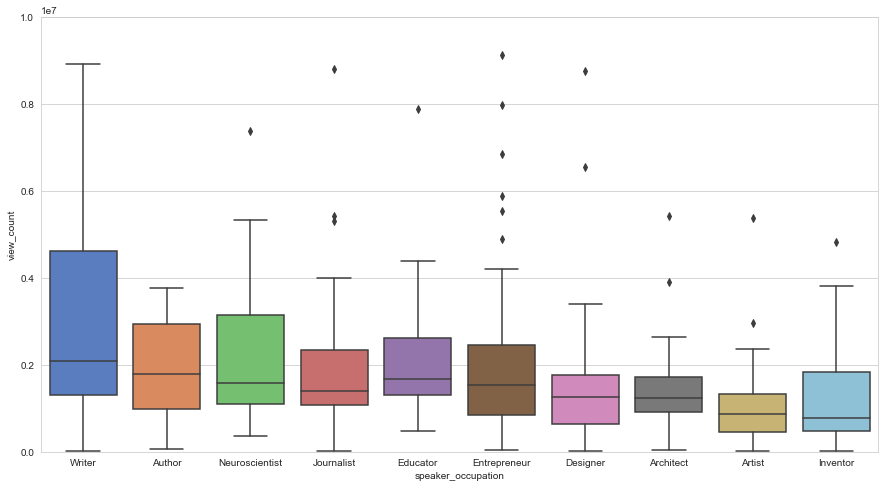

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='view_count', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 1e7])
plt.show()

**Observations**
<ul>
    <li>
        On average, out of the top 10 most popular professions, <b>Writers </b> tend to have the most views and have the greatest range of views
    </li>
    <li> Also it appears that most <b>Entrepreneurs</b> do not give talks with a large number of views except for a fiew outliers. That is a bit suprising to us as we thought that a big part of being an entrpreneur is being able to give convincing and touching talks. But this philosophical question is may be for another time.
    </li>
    <li> It also appears that identifying yourself as an <b> Inverntor </b> does not automatically gurantee you a large number of views.
</ul>

Perhaps our data is flawed as many writer may identify themselves as writers and authors:

In [ ]:
print(len(df.loc[(df['speaker_occupation'].isin(['Writer']))]))
df.loc[(df['speaker_occupation'].isin(['Writer']))][['speaker_name','speaker_occupation']]

57


,speaker_name,speaker_occupation
12,Mary Roach,Writer
31,Elizabeth Gilbert,Writer
82,Andrew Solomon,Writer
127,Malcolm Gladwell,Writer
167,Malcolm Gladwell,Writer
188,Andrew Solomon,Writer
211,Jenna McCarthy,Writer
222,Leslie Morgan Steiner,Writer
238,Thordis Elva and Tom Stranger,Writer
241,Joshua Foer,Writer


# What about the number of languages that your talk should be avaialble at? Is it true that more is better?

One remarkable aspect of TED Talks is the sheer number of languages in which it is accessible. Let us perform some very basic data visualisation and descriptive statistics about languages at TED.

In [ ]:
df['number_of_subtitles'].describe()

count    4244.000000
mean       21.789821
std        12.487491
min         0.000000
25%        16.000000
50%        24.000000
75%        30.000000
max        72.000000
Name: number_of_subtitles, dtype: float64

On average, a TED Talk is available in **21** different languages. The maximum number of languages a TED Talk is available in is a staggering 72. Let us check which talk this is.

In [ ]:
df[df['number_of_subtitles'] == 72]

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles,month,day,year
50,70,8 secrets of success,Richard St. John,Why do people succeed? Is it because they're s...,"Marketer, success analyst","['business', 'culture', 'entertainment', 'happ...",210,15148152,TED2005,2005-02-23,2006-12-14,en,72,Feb,Wed,2005


We will plot the number of subtitles available for a talk against the view counts, with dropping the null values

Pearson coefficient =  0.3463540470931365


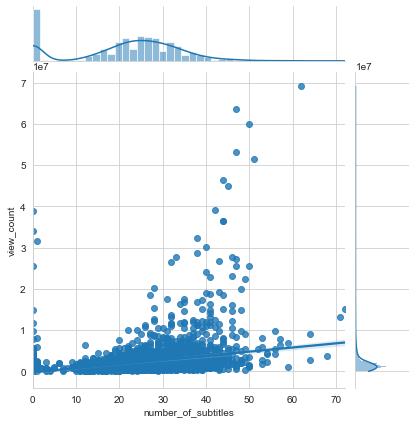

In [ ]:
print("Pearson coefficient = ",df['number_of_subtitles'].corr(df['view_count']))
sns.jointplot(x='number_of_subtitles', y='view_count', data=df, kind = 'reg')
plt.show()

As it appears, there is **not that much of strong correlation** between number of subtitles available for a given talk and its number of views. Content quality seems to be dominant in TED talks.

# What should your talk be about? Which themes attract most views?

![](./Topics.gif)

In this section, we will try to find out the most popular themes in the TED conferences. Although TED started out as a conference about technology, entertainment and design, it has since diversified into virtually every field of study and walk of life. It will be interesting to see if this conference with Silicon Valley origins has a bias towards certain topics.

To answer this question, we need to wrangle our data in a way that it is suitable for analysis. More specifically, we need to split the related_tags list into separate rows.

In [ ]:
import ast
df['tags'] = df['talk_tags'].apply(lambda x : ast.literal_eval(x))
df.head()

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles,month,day,year,tags
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,"Author, educator","['children', 'creativity', 'culture', 'dance',...",1164,69154230,TED2006,2006-02-25,2006-06-27,en,62,Feb,Sat,2006,"[children, creativity, culture, dance, educati..."
1,2405,This is what happens when you reply to spam email,James Veitch,"Suspicious emails: unclaimed insurance bonds, ...","Comedian, writer","['comedy', 'curiosity', 'communication', 'humo...",588,63556835,TEDGlobal>Geneva,2015-12-08,2020-10-23,en,47,Dec,Tue,2015,"[comedy, curiosity, communication, humor, tech..."
2,1569,Your body language may shape who you are,Amy Cuddy,(NOTE: Some of the findings presented in this ...,Social psychologist,"['body language', 'brain', 'business', 'psycho...",1262,59958589,TEDGlobal 2012,2012-06-26,2012-10-01,en,50,Jun,Tue,2012,"[body language, brain, business, psychology, s..."
3,848,How great leaders inspire action,Simon Sinek,Simon Sinek has a simple but powerful model fo...,Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1084,53105906,TEDxPuget Sound,2009-09-17,2010-05-04,en,47,Sep,Thu,2009,"[TEDx, business, entrepreneur, leadership, suc..."
4,1042,The power of vulnerability,Brené Brown,Brené Brown studies human connection -- our ab...,"Vulnerability researcher, storyteller","['TEDx', 'communication', 'culture', 'depressi...",1219,51501858,TEDxHouston,2010-06-06,2010-12-23,en,51,Jun,Sun,2010,"[TEDx, communication, culture, depression, fea..."


In [ ]:
s = df.apply(lambda x: pd.Series(x['tags'], dtype =  'str'),axis=1).stack().reset_index(level = 1, drop = True)
s.name = 'theme'
theme_df = df.drop('tags', axis=1).join(s)
theme_df = theme_df[theme_df['event']!= 'TED-Ed']
theme_df.head()

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles,month,day,year,theme
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,"Author, educator","['children', 'creativity', 'culture', 'dance',...",1164,69154230,TED2006,2006-02-25,2006-06-27,en,62,Feb,Sat,2006,children
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,"Author, educator","['children', 'creativity', 'culture', 'dance',...",1164,69154230,TED2006,2006-02-25,2006-06-27,en,62,Feb,Sat,2006,creativity
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,"Author, educator","['children', 'creativity', 'culture', 'dance',...",1164,69154230,TED2006,2006-02-25,2006-06-27,en,62,Feb,Sat,2006,culture
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,"Author, educator","['children', 'creativity', 'culture', 'dance',...",1164,69154230,TED2006,2006-02-25,2006-06-27,en,62,Feb,Sat,2006,dance
0,66,Do schools kill creativity?,Sir Ken Robinson,Sir Ken Robinson makes an entertaining and pro...,"Author, educator","['children', 'creativity', 'culture', 'dance',...",1164,69154230,TED2006,2006-02-25,2006-06-27,en,62,Feb,Sat,2006,education


In [ ]:
len(theme_df['theme'].value_counts())

455

We have more then 455 themes in different TED talks

In [ ]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,technology,1053
1,science,879
2,culture,637
3,society,633
4,TEDx,629
5,global issues,615
6,social change,606
7,business,538
8,design,530
9,humanity,431


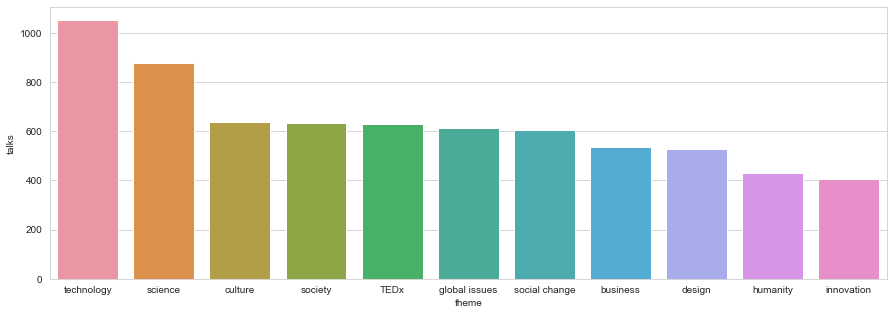

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(11))
plt.show()

**Observations:**
<ul>
    <li>
        As may have been expected, <b>Technology</b> is the most popular topic for talks, followed by <b>science</b> and <b> culture</b>
    </li>
    <li>
        By comparing these results with the results of 2017, it semes that the intreset of viewers in <b>global issues</b> have decreased as <b>it ranked third in 2017</b>. We beleive that this because of the uprising of conspiracy theories and people may have had enough of people tellung them about the end of the world.
    </li>
</ul>

Now let's see how the number of talks around a certain topic has changed over the years

In [ ]:
pop_theme_talks = theme_df[(theme_df['theme'].isin(pop_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]
pop_theme_talks['year'] = pop_theme_talks['year'].astype('int').copy()
pop_theme_talks = pop_theme_talks[(pop_theme_talks['year'] > 2008) & (pop_theme_talks['year'] < 2021)]
pop_theme_talks

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles,month,day,year,theme
1,2405,This is what happens when you reply to spam email,James Veitch,"Suspicious emails: unclaimed insurance bonds, ...","Comedian, writer","['comedy', 'curiosity', 'communication', 'humo...",588,63556835,TEDGlobal>Geneva,2015-12-08,2020-10-23,en,47,Dec,Tue,2015,technology
2,1569,Your body language may shape who you are,Amy Cuddy,(NOTE: Some of the findings presented in this ...,Social psychologist,"['body language', 'brain', 'business', 'psycho...",1262,59958589,TEDGlobal 2012,2012-06-26,2012-10-01,en,50,Jun,Tue,2012,business
2,1569,Your body language may shape who you are,Amy Cuddy,(NOTE: Some of the findings presented in this ...,Social psychologist,"['body language', 'brain', 'business', 'psycho...",1262,59958589,TEDGlobal 2012,2012-06-26,2012-10-01,en,50,Jun,Tue,2012,science
3,848,How great leaders inspire action,Simon Sinek,Simon Sinek has a simple but powerful model fo...,Leadership expert,"['TEDx', 'business', 'entrepreneur', 'leadersh...",1084,53105906,TEDxPuget Sound,2009-09-17,2010-05-04,en,47,Sep,Thu,2009,business
4,1042,The power of vulnerability,Brené Brown,Brené Brown studies human connection -- our ab...,"Vulnerability researcher, storyteller","['TEDx', 'communication', 'culture', 'depressi...",1219,51501858,TEDxHouston,2010-06-06,2010-12-23,en,51,Jun,Sun,2010,culture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,5133,The future of economic success is collaborative,Jay Cousins,"These days, even big corporations are joining ...",Solutions catalyst,"['open-source', 'technology', 'business', 'col...",653,10031,TED@BCG Berlin,2014-10-21,2017-12-01,en,0,Oct,Tue,2014,business
4924,6059,Using the Super Bowl to give back,Joe Davis,"The Super Bowl is one of the biggest sports, c...",Game changer,"['sports', 'business', 'development', 'leaders...",402,10031,TED@BCG San Francisco,2013-10-30,2017-12-01,en,0,Oct,Wed,2013,business
4926,4233,How technology can reconnect parents and kids,Lana Yarosh,When children are separated from their parents...,"Assistant Professor, University of Minnesota D...","['technology', 'children', 'family', 'parentin...",1158,10031,TEDxMinneapolis,2017-08-18,2017-11-10,en,0,Aug,Fri,2017,technology
4927,66962,Countdown Session 5: Action (Full session),Hosted by Chris Hemsworth and Priyanka Chopra ...,It's time to take action. This closing session...,"Actor, producer, activist","['climate change', 'science', 'technology', 'a...",3897,10031,Countdown,2020-10-10,2020-10-15,en,0,Oct,Sat,2020,science


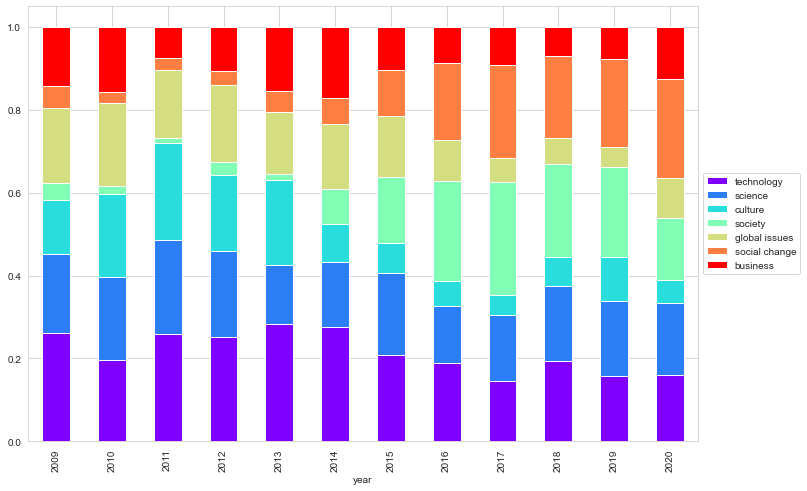

In [ ]:
themes = list(pop_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

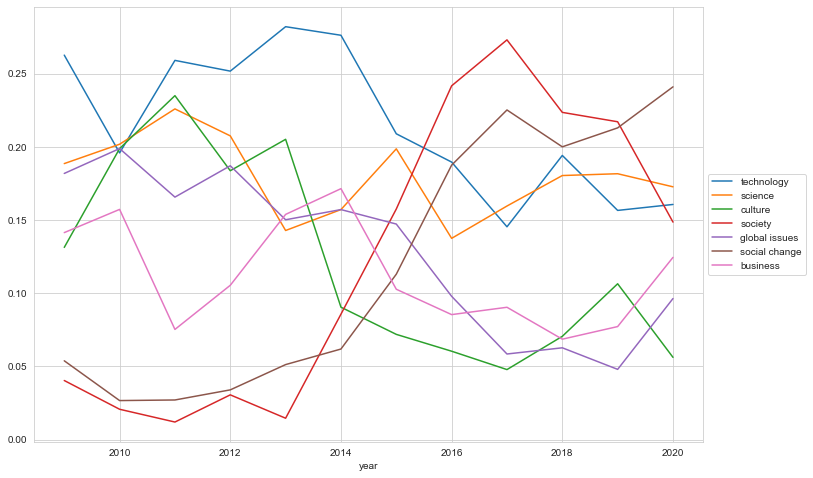

In [ ]:
ctab[themes].plot(kind='line', stacked=False, figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Observations:**
<ul>
    <li>
        It appears that the number of talks about <b>science</b> is most stable throughout the years.
    </li>
    <li>
        Talks about <b> technology</b> have been decreasing over the years but it appears to be re-gaining momentum
    </li>
    <li>
        <b>Society </b> has spiked from 2013 till 2017 and then began to decline again
    </li>
    </ul>
It should be noted that this particular analysis contradicts with the analysis made on the dataset collected till 2017. We beleive that this is because many talks are uploaded at a later time than their film date.

(0.0, 10000000.0)

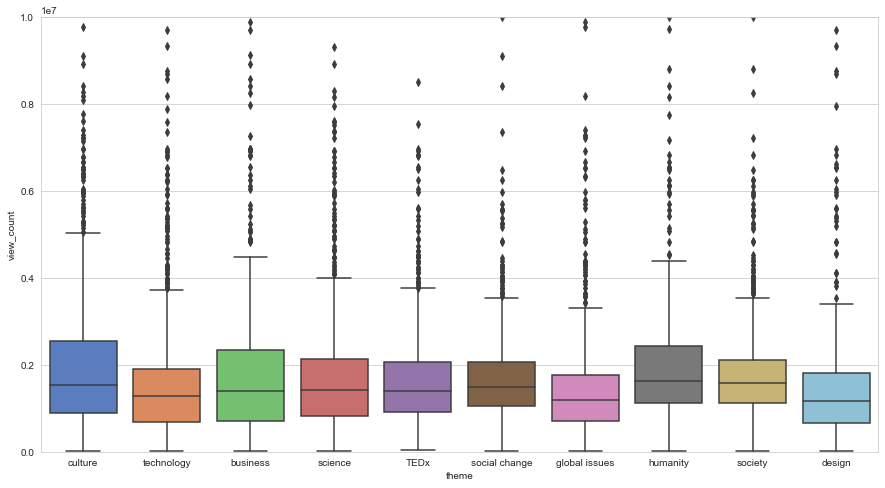

In [ ]:
pop_theme_talks = theme_df[theme_df['theme'].isin(pop_themes.head(10)['theme'])]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='theme', y='view_count', data=pop_theme_talks, palette="muted", ax =ax)
ax.set_ylim([0, 1e7])

# No one likes a long boring talk!
![](./Bored.gif) <Br>
In this section we aim to find the relation , if exists, between the length of a talk and the number of views it has.

In [ ]:
df['duration'] = df['duration'] / 60

In [ ]:
df['duration'].value_counts().sort_index()

0.000000     1
1.100000     1
1.150000     1
1.216667     1
1.316667     2
            ..
67.950000    1
68.750000    1
69.650000    1
76.450000    1
87.616667    1
Name: duration, Length: 1250, dtype: int64

There appears to be some noise as there can not be a talk with duration less than one minute (and of course zero)
<br>we don't think that very long ones are also actual ted talks

In [ ]:
df[df['duration'] < 2.0]

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles,month,day,year,tags
4423,67238,Why is the world warming up?,Kristen Bell + Giant Ant,A brief answer to one of the key questions abo...,"Actor, executive producer","['climate change', 'Countdown', 'science', 'an...",1.216667,94744,Countdown,2020-10-10,2020-10-10,en,0,Oct,Sat,2020,"[climate change, Countdown, science, animation..."
4441,67241,Why is 1.5 degrees such a big deal?,Kristen Bell + Giant Ant,A brief answer to one of the key questions abo...,"Actor, executive producer","['climate change', 'animation', 'Countdown', '...",1.100000,73473,Countdown,2020-10-10,2020-10-10,en,0,Oct,Sat,2020,"[climate change, animation, Countdown, science..."
4458,67240,Where does all the carbon we release go?,Kristen Bell + Giant Ant,A brief answer to one of the key questions abo...,"Actor, executive producer","['Countdown', 'science', 'climate change', 'an...",1.316667,63377,Countdown,2020-10-10,2020-10-10,en,0,Oct,Sat,2020,"[Countdown, science, climate change, animation..."
4470,67239,What is net-zero?,Kristen Bell + Giant Ant,A brief answer to one of the key questions abo...,"Actor, executive producer","['Countdown', 'animation', 'climate change', '...",1.150000,59302,Countdown,2020-10-10,2020-10-10,en,0,Oct,Sat,2020,"[Countdown, animation, climate change, science..."
4521,67242,Why act now?,Kristen Bell + Giant Ant,A brief answer to one of the key questions abo...,"Actor, executive producer","['Countdown', 'science', 'climate change', 'an...",1.316667,41930,Countdown,2020-10-10,2020-10-10,en,0,Oct,Sat,2020,"[Countdown, science, climate change, animation..."
4664,9468,A business against racism,Villy Wang,Villy Wang is in the business of rewriting ste...,Media activist,"['race', 'film', 'social change', 'media', 'st...",0.000000,15555,TED@IBM,2016-11-15,2018-02-12,en,0,Nov,Tue,2016,"[race, film, social change, media, student]"
4716,14610,"""Illusions for a better society""","Aaron Duffy, Lake Buckley and Jack Foster",Could visual illusions be a cure for polarizat...,unknown,"['visualizations', 'film']",1.783333,11463,TED2018,2018-04-13,2018-04-14,en,0,Apr,Fri,2018,"[visualizations, film]"
4822,31234,"""Healthcare Anthem of Merck KGaA, Darmstadt, G...",Lars Jönsson,"A thoughtful ode to health care, composed by T...",Pianist,"['performance', 'piano', 'arts']",1.500000,10031,"TED@Merck KGaA, Darmstadt, Germany",2018-11-26,2019-01-14,en,0,Nov,Mon,2018,"[performance, piano, arts]"
4866,14611,"""It's not amazing enough""",Duncan Cowles,The pressures of having to make an amazing fil...,Documentary filmmaker,"['humor', 'film']",1.500000,10031,TED2018,2018-04-12,2018-04-14,en,0,Apr,Thu,2018,"[humor, film]"


 They all appear to be valid videos except for "A business against racism" So we just got its value from the site.

In [ ]:
df.loc[df['duration'] == 0, 'duration'] = 11.28
df['duration'].value_counts().sort_index()

1.100000     1
1.150000     1
1.216667     1
1.316667     2
1.500000     2
            ..
67.950000    1
68.750000    1
69.650000    1
76.450000    1
87.616667    1
Name: duration, Length: 1250, dtype: int64

In [ ]:
df[df['duration'] == df['duration'].max()]

,talk_id,name,speaker_name,description,speaker_occupation,talk_tags,duration,view_count,event,film_date,published_date,language,number_of_subtitles,month,day,year,tags
3894,798,"Parrots, the universe and everything",Douglas Adams,"Blind river dolphins, reclusive lemurs, a parr...","Author, satirist","['biodiversity', 'biology', 'comedy', 'life', ...",87.616667,496534,University of California,2001-05-16,2010-03-16,en,0,May,Wed,2001,"[biodiversity, biology, comedy, life, religion..."


This talk is not a real talk at all and we can safely remove similar talks with such larger duration 

Pearson coefficient =  0.06800159342954752


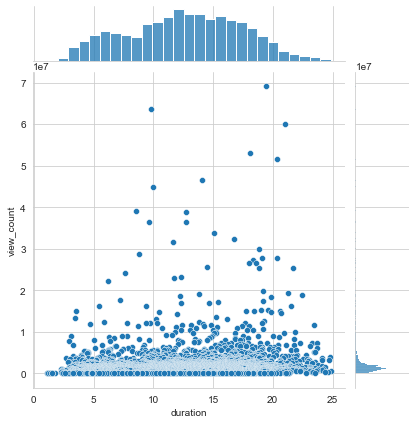

In [ ]:
sns.jointplot(x='duration', y='view_count', data=df[df['duration'] < 25])
print("Pearson coefficient = ",df['duration'].corr(df['view_count']))
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

There seems to be almost no correlation between these two quantities. This strongly suggests that there is no tangible correlation between the length and the popularity of a TED Talk. Content is king at TED.

# We have looked about the topics, but which words really affect people?
![](./PowerWordsSq.gif)

In [ ]:
df2 = pd.read_csv('TED_Talk.csv')

In [ ]:
df2 = df2[['talk__name','transcript']]
df2.fillna('',inplace=True)

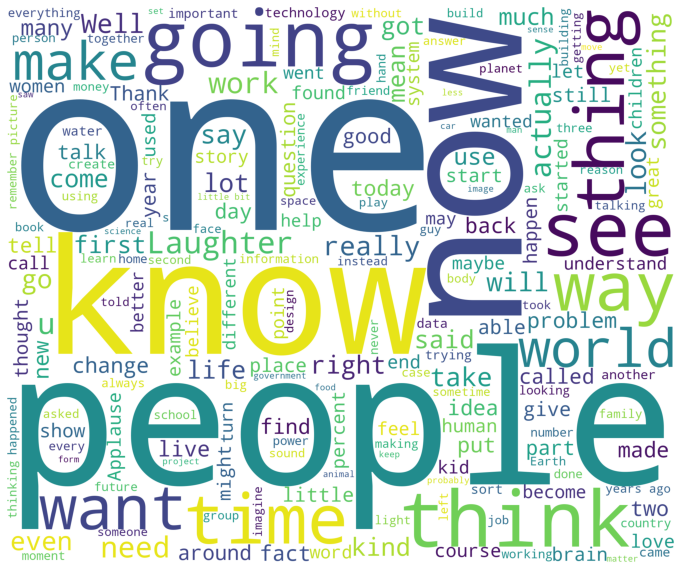

In [ ]:
corpus = ' '.join(df2['transcript'])
corpus = corpus.replace('.', '. ')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Since we are talking about words to use, let's analyze the tags and words used even further


## Should your talk title be a statment or a question?

In [ ]:
df = pd.read_csv('TED_Talk.csv')

In [ ]:
#Name_Type column contains Question or Statement.
df['Name_type'] = df['talk__name'].apply(lambda x: "Question" if x[-1] == '?' else "Statment")


Name_Type_Scores = [0, 0]
Name_Type_Count = [0, 0]

for i in range(len(df['Name_type'])):
    if(df['Name_type'][i] == "Question"): 
        Name_Type_Scores[1] += df['view_count'][i]
        Name_Type_Count[1] += 1
    else:
        Name_Type_Scores[0] += df['view_count'][i]
        Name_Type_Count[0] += 1

Name_Type_X = ['Statement', 'Question']
Name_Type_Y1 = [0, 0]
Name_Type_Y2 = [0, 0]

for i in range(2):
    #Name_Type_Y1 contains the total number of views on this name type records
    Name_Type_Y1[i] = Name_Type_Scores[i]
    #Name_Type_Y2 contains the mean of the number of views on this name type records
    Name_Type_Y2[i] = Name_Type_Scores[i]/Name_Type_Count[i]
    
print('Number of talks with Questions  as its title: ',len(df[df['Name_type'] == 'Question'])) 
print('Number of talks with Statements as its title: ', len(df) - len(df[df['Name_type'] == 'Question']))

Number of talks with Questions  as its title:  577
Number of talks with Statements as its title:  4351


Text(0, 0.5, 'Mean of the views')

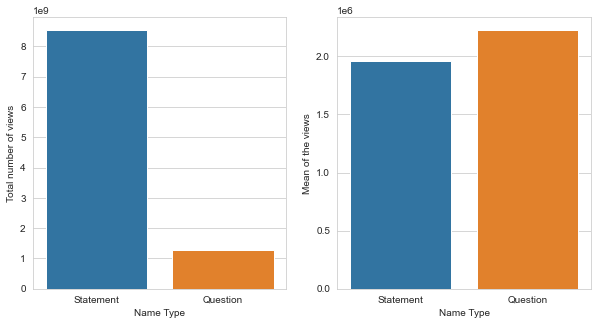

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.barplot(x = Name_Type_X , y = Name_Type_Y1)
plt.xlabel('Name Type', weight = 'bold', size = 12)
plt.ylabel('Total number of views', weight = 'bold', size = 12)

plt.subplot(1, 2, 2)
sns.barplot(x = Name_Type_X, y = Name_Type_Y2)
plt.xlabel('Name Type', weight = 'bold', size = 12)
plt.ylabel('Mean of the views', weight = 'bold', size = 12)

<b>Despite the fact that much more talks has their titles in the form of a statments. Talks using Questions as their values has a larger mean

# Let's return to the themes, Are talks about technology really different about science? Can we group these tags to an even more general theme?

In [ ]:
from gensim.models import KeyedVectors
from gensim import models
destring = []

for number in range(len(df)):
    destring.append(ast.literal_eval(df['talks__tags'][number]))

df['Tags'] = pd.Series(destring)



# model = KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", 
#                                           binary=True)
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", 
                                          binary=True)

In [ ]:
#listed is a list of strings that contains all tags
listed = [item for sublist in destring for item in sublist]
listed = pd.Series(listed)

#list2 is a list of strings that contains all unique tags
lists = list(listed.unique())

#remove empty strings
lists2 = [ x for x in lists if " " not in x ]
lists2 = [ x for x in lists2 if "-" not in x ]

In [ ]:
lists2.remove('cryptocurrency')
lists2.remove('TEDNYC')
lists2.remove('blockchain')
lists2.remove('TEDYouth')
lists2.remove('archaeology')
lists2.remove('deextinction')

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

labels = []    
tokens = []    

for word in lists2:
    labels.append(word)          #contains the tags
    tokens.append(model[word])   #contains a vector for each tag

#Reduce the number of components in the tokens list to 2 components to be represented in 2D
tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=105000, random_state=17,learning_rate=5500)
new_values = tsne_model.fit_transform(tokens)

#Clustring the vectors to 15 Category
kmeans = KMeans(n_clusters=15,n_init=200)
kmeans.fit(tokens)

#give each vector a number to indicate which cluster it belongs
clusters = kmeans.predict(tokens)

df_tsne = pd.DataFrame(new_values, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Cluster'] = clusters

As the PCA amd TSNE algorithms are used for dimentionality reduction, the vectors are ready to be represented in 2-D. 
On the following scattered plot, each vector is plotted as a single point. By using K-Means Algorithm; the points are clustered to 15 groups

Text(0.5, 1.0, 'Tag Clusters')

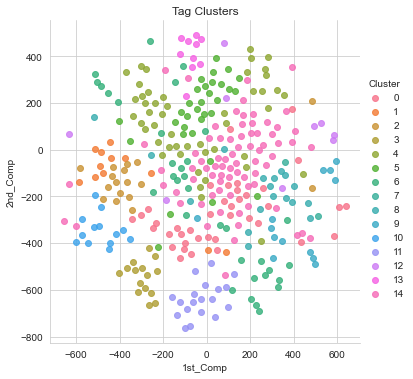

In [ ]:
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Cluster', fit_reg=False)
plt.title("Tag Clusters")

## Giving each cluster a name to represent the category

In [ ]:
convert = {labels[word]: clusters[word] for word in range(len(labels))}
comp = pd.DataFrame(labels)
comp['cluster'] = clusters
d = {'Name': labels, 'Clusters' : clusters}
comp_cpy = pd.DataFrame(d)
comp_cpy.head()
grp =[]
for i in range(15):
    grp.append([])
for i in range(len(comp_cpy)):
  #Appending the tag to its cluster group
    grp[comp_cpy['Clusters'][i]].append(comp_cpy['Name'][i])

Manual conversion was done by observing words in each cluster and choosing a representable name. However, the clustring is not the same on each run. This manual conversion won't be a good representaion for the categories. We choose to rename the clusters by a random item name in the cluster list

In [ ]:
comp_conver = {0:'Economics/Bussiness',1:'Global issues',2:'Exploration',3:'Humanity/Progress',
              4:'Music',5:'Scientific Fields',6:'Technology/Computer',7:'Ecology',8:'Epidemics',
              9:'Philanthropy/Religion',10:'Arts',11:'Animals/Organisms',12:' Social',13:'asteroid',
              14:'Media/Entertainment', 15:'NA'}


In [ ]:
import random
for i in range(15):
    comp_conver[i] = grp[i][0]
comp_conver


{0: 'technology',
 1: 'brain',
 2: 'science',
 3: 'animals',
 4: 'creativity',
 5: 'education',
 6: 'children',
 7: 'Google',
 8: 'Internet',
 9: 'war',
 10: 'Planets',
 11: 'depression',
 12: 'visualizations',
 13: 'dance',
 14: 'communication',
 15: 'NA'}

Adding the categories as features to the data frame in the way that if the record has a tag that are categorized in x category, the x category will have 1 in this record, otherwise it will be 0

In [ ]:
comp['group'] = 'None'
for ii in range(len(comp)):
    comp['group'][ii] = comp_conver[comp['cluster'][ii]]
    
unique = comp['group'].unique()

for group in unique:
    df[group+'_category'] = 0
    for item in range(len(df['Tags'])):
        for ii in df['Tags'][item]:
            try:
                clust = convert[ii]
            except KeyError:
                clust = 15
            grouping = comp_conver[clust]
            if grouping == group:
                df[group+'_category'][item] = 1
                
df.filter(like='_category', axis=1).head()

,children_category,creativity_category,dance_category,education_category,communication_category,technology_category,brain_category,science_category,depression_category,Internet_category,visualizations_category,war_category,Planets_category,animals_category,Google_category
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0


# Finally, Let's create model(s) to predict the number of views your talk would have


## One of the important features we will use in our analysis is the related views
As each talk has some related talks, it is essential to consider the view counts in each related talk. The related views feature will hold the average of views among the record’s related talks.

In [ ]:
df['related_views'] = 0
for index, row in df.iterrows():
    vids = row['related_talks'].split(',')
    counter = 0
    total = 0
    for views in vids:
        if 'viewed_count' in views:
            view = views.split(':')
            # to get rid of brackets and spaces
            view[1] = view[1].replace("]", "")
            view[1] = view[1].replace(" ", "")
            view[1] = view[1].replace("}", "")
            total+=int(view[1])
            counter+=1
    df['related_views'][index] = total/max(counter,1)

df['related_views']

0        5454896
1       14039118
2       14340268
3        5438611
4        4947326
          ...   
4923     6698179
4924     3392088
4925      800972
4926     1153673
4927     1147747
Name: related_views, Length: 4928, dtype: int64

In [ ]:
df['published_timestamp_month'] = df['published_timestamp'].apply(lambda x: x[5:7])
df['published_timestamp_day'] = df['published_timestamp'].apply(lambda x: x[8:10])
df.head()

,talk__id,talk__name,talk__description,view_count,comment_count,duration,transcript,video_type_name,event,number_of__speakers,...,depression_category,Internet_category,visualizations_category,war_category,Planets_category,animals_category,Google_category,related_views,published_timestamp_month,published_timestamp_day
0,66,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,69154230,NaN,1164,Good morning. How are you?(Audience) Good.It's...,TED Stage Talk,TED2006,1,...,0,0,0,0,0,0,0,5454896,06,27
1,2405,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",63556835,NaN,588,"A few years ago, I got one of those spam email...",TED Stage Talk,TEDGlobal>Geneva,1,...,0,0,0,0,0,0,0,14039118,10,23
2,1569,Your body language may shape who you are,(NOTE: Some of the findings presented in this ...,59958589,NaN,1262,So I want to start by offering you a free no-t...,TED Stage Talk,TEDGlobal 2012,1,...,0,0,0,0,0,0,0,14340268,10,01
3,848,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,53105906,NaN,1084,How do you explain when things don't go as we ...,TEDx Talk,TEDxPuget Sound,1,...,0,0,0,0,0,0,0,5438611,05,04
4,1042,The power of vulnerability,Brené Brown studies human connection -- our ab...,51501858,NaN,1219,"So, I'll start with this: a couple years ago, ...",TEDx Talk,TEDxHouston,1,...,1,0,0,0,0,0,0,4947326,12,23


In [ ]:
views = df['view_count']
final_df = df[['duration', 'Name_type','related_views', 'published_timestamp_day', 'published_timestamp_month']]
for x in df:
    if '_category' in x:
        final_df[x] = df[x]

final_df['categories_count'] = 0
for x in final_df:
    if '_category' in x:
        for j in range(len(final_df)):
            if(final_df[x][j] == 1):
                final_df['categories_count'][j]+=final_df[x][j]

final_df.head()

,duration,Name_type,related_views,published_timestamp_day,published_timestamp_month,children_category,creativity_category,dance_category,education_category,communication_category,...,brain_category,science_category,depression_category,Internet_category,visualizations_category,war_category,Planets_category,animals_category,Google_category,categories_count
0,1164,Question,5454896,27,06,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4
1,588,Statment,14039118,23,10,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,4
2,1262,Statment,14340268,01,10,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,5
3,1084,Statment,5438611,04,05,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,1219,Statment,4947326,23,12,1,1,0,0,1,...,1,0,1,0,0,0,0,0,0,5


In [ ]:
data_final = pd.get_dummies(final_df)
data_final.shape
data_final.head()

,duration,related_views,children_category,creativity_category,dance_category,education_category,communication_category,technology_category,brain_category,science_category,...,published_timestamp_month_03,published_timestamp_month_04,published_timestamp_month_05,published_timestamp_month_06,published_timestamp_month_07,published_timestamp_month_08,published_timestamp_month_09,published_timestamp_month_10,published_timestamp_month_11,published_timestamp_month_12
0,1164,5454896,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,588,14039118,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1262,14340268,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,1084,5438611,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1219,4947326,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import metrics
import time

X_train, X_test, y_train, y_test = train_test_split(data_final, views, test_size=0.2, random_state=1)

**Four Regression Methods were used to predict the number of views according to the prepared features.
We used two parameters to compare between the 4 methods which are Accuracy and Time

**Accuracy was measured by MAE (Mean Absolute Error)**

In [ ]:
rf = RandomForestRegressor(criterion='mae',max_depth=15, max_features=45, n_estimators=500, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)
tic = time.perf_counter()
rf.fit(X_train, y_train)
toc = time.perf_counter()
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Views mean: {:0.2f}'.format(views.mean()))
print('Views std: {:0.2f}'.format(views.std()))
print('Total fitting time: ',toc - tic )

Training MAE: 936782.56
Test MAE: 1428783.78
Views mean: 1993016.16
Views std: 3501170.05
Total fitting time:  204.37820179999997


Using the random forest regressor, the importances of each features could be shown in the following barplot

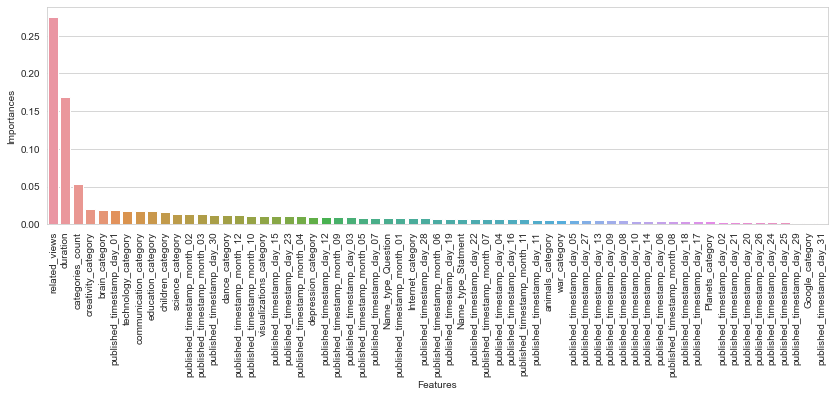

In [ ]:
importances = pd.DataFrame({'Features': X_train.columns, 
                                'Importances': rf.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

## XGBoost Regressor

In [ ]:
xgbr = xgb.XGBRegressor(criterion='mae', earning_rate=0.1, 
                        max_depth=10, subsample=0.5, n_estimators=20, min_child_weight=2, random_state=2019)
tic = time.perf_counter()
xgbr.fit(X_train, y_train)
toc = time.perf_counter()
y_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Total fitting time: ',toc - tic )

[05:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, earning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training MAE: 957188.17
Test MAE: 1704590.00
Total fitting time:  0.19341739999998708


## Extra Trees Regressor¶

In [ ]:
et = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=100, random_state=2019, min_samples_leaf=2, min_samples_split=6)
tic = time.perf_counter()
et.fit(X_train, y_train)
toc = time.perf_counter()
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Total fitting time: ',toc - tic )

Training MAE: 649228.46
Test MAE: 1413310.64
Total fitting time:  112.3990384


## LightGBM Regressor

In [ ]:
lgbm = lgb.LGBMRegressor(max_depth=5, n_estimators=50, random_state=2019)
tic = time.perf_counter()
lgbm.fit(X_train, y_train)
toc = time.perf_counter()
y_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Total fitting time: ',toc - tic )

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training MAE: 1313007.53
Test MAE: 1526545.78
Total fitting time:  0.06046859999997878


As shown in the result table, the Extra Trees Regression was the most accurate regression method as it has the lowest MAE either on the training records or in the test records. On the other hand, the LightGBM Regression was the fastest regression method. Actually, reducing the n_estimators in the random forest or the Extra trees could reduce their fitting time, but unfortunately their accuracies will also decrease.

![](Thanktou.jpg)

![](Barack_Obama_drops_the_mic.gif)